In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
base_path ='/kaggle/input/face-expression-recognition-dataset/images/images/'

In [10]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3205 surprise images
4103 fear images
3993 angry images
4982 neutral images
4938 sad images
436 disgust images
7164 happy images


In [11]:
pic_size =48

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [13]:
validation_generator

In [14]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import tensorflow as tf

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [15]:
input_shape = (48,48,1)
X_input = Input(input_shape)


# CONV -> BN -> RELU Block applied to X
X = Conv2D(64, (3, 3), strides = (1, 1),padding='same', name = 'conv0')(X_input)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool0')(X)
X = Dropout(0.25)(X)


# CONV -> BN -> RELU Block applied to X
X = Conv2D(256, (5, 5) , strides = (1, 1),padding='same', name = 'conv1')(X)
X = BatchNormalization(axis = 3, name = 'bn1')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool1')(X)
X = Dropout(0.25)(X)


# CONV -> BN -> RELU Block applied to X
X = Conv2D(512, (5, 5), strides = (1, 1),padding='same', name = 'conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool2')(X)
X = Dropout(0.25)(X)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(512, (3, 3), strides = (1, 1),padding='same', name = 'conv3')(X)
X = BatchNormalization(axis = 3, name = 'bn3')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool3')(X)
X = Dropout(0.25)(X)




# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X = Flatten()(X)
X = Dense(256, name='fc')(X)
X = BatchNormalization(name = 'bn4')(X)
X = Activation('relu')(X)
X = Dropout(0.25)(X)

X = Dense(512, name='fc2')(X)
X = BatchNormalization(name = 'bn5')(X)
X = Activation('relu')(X)
X = Dropout(0.25)(X)

X = Dense(7, activation='softmax', name='fc3')(X)

# Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
model = Model(inputs = X_input, outputs = X)

In [16]:
model.compile(optimizer=Adam(lr = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
%%time



history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=50,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                )

Epoch 1/50
225/225 [==============================] - 311s 1s/step - loss: 1.9976 - accuracy: 0.2371 - val_loss: 1.7032 - val_accuracy: 0.3388
Epoch 2/50
225/225 [==============================] - 27s 120ms/step - loss: 1.8046 - accuracy: 0.3060 - val_loss: 1.6132 - val_accuracy: 0.3685
Epoch 3/50
225/225 [==============================] - 27s 122ms/step - loss: 1.6876 - accuracy: 0.3553 - val_loss: 1.5905 - val_accuracy: 0.4017
Epoch 4/50
225/225 [==============================] - 26s 118ms/step - loss: 1.6069 - accuracy: 0.3842 - val_loss: 1.5207 - val_accuracy: 0.4233
Epoch 5/50
225/225 [==============================] - 27s 121ms/step - loss: 1.5405 - accuracy: 0.4089 - val_loss: 1.6288 - val_accuracy: 0.4149
Epoch 6/50
225/225 [==============================] - 27s 120ms/step - loss: 1.4681 - accuracy: 0.4363 - val_loss: 1.4292 - val_accuracy: 0.4622
Epoch 7/50
225/225 [==============================] - 30s 132ms/step - loss: 1.4158 - accuracy: 0.4575 - val_loss: 1.3122 - val_accu

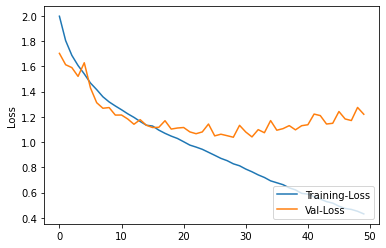

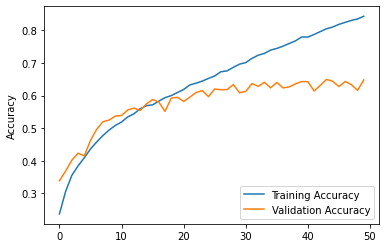

In [18]:
plt.ylabel('Loss', fontsize=10)
plt.plot(history.history['loss'], label='Training-Loss')
plt.plot(history.history['val_loss'], label='Val-Loss')
plt.legend(loc='lower right')
plt.show()
plt.ylabel('Accuracy', fontsize=10)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [19]:
model.evaluate_generator(generator =validation_generator)

[1.221233606338501, 0.6473252177238464]